In [13]:
import os
from os.path import dirname as up
import math
import glob
import random
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.windows import Window, get_data_window
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Polygon, MultiPolygon
import pyproj
import shapely.ops
from shapely.geometry import shape
from geopandas import GeoSeries
import time
import sys
# Get the parent directory
sys.path.append('..')
from tools.building_data_utils import *
# random.seed(10)

In [2]:
# import pandas as pd
# import random
# import ast

# n=225
# d=63
# filename = f'./Processed/Building_1000_PS-RGBNIR_step_{d}_n_pins_{n}_mesh.csv'

# df = pd.read_csv(filename)

# # Assuming df.iloc[:, 1] and df.iloc[:, 2] are your lists
# column1 = df.iloc[:, 1].apply(ast.literal_eval)
# column2 = df.iloc[:, 2].apply(ast.literal_eval)

# clm_1 = column1.copy()
# clm_2 = column2.copy()

# # Combine the two lists
# new_order = np.random.permutation(len(clm_1[0]))
    
# for i in range(len(column1)):
#     clm_1[i] = [column1[i][j] for j in new_order]
#     clm_2[i] = [column2[i][j] for j in new_order]
#     # combined_lists = zip(clm_1, clm_2)
#     # # Unzip the shuffled lists
#     # shuffled_column1, shuffled_column2 = zip(*combined_lists)
#     # clm_1[i], clm_2[i] = shuffled_column1, shuffled_column2

# # clm_1[0], clm_2[0], column1[0], column2[0]
# df_new = df.copy()
# df_new.iloc[:,1] = clm_1
# df_new.iloc[:,2] = clm_2
# df_new.head()

# filename_new = f'./latest/Building_1000_PS-RGBNIR_step_{d}_n_pins_{n}_mesh.csv'
# df_new.to_csv(filename_new, index=False)

In [ ]:
column1[2], column2[2], clm_1[2], clm_2[2]

In [ ]:
df.head()

Divide pins by n

In [33]:
import ast
import pandas as pd
import os

n=200
# d=63

def extract_file_name(path):
    return os.path.basename(path)
# def resize_pins(path_to_csv):
# Read the CSV file into a DataFrame
df = pd.read_csv(f'Building_{n}_random.csv')

# Display the first few rows of the DataFrame
# df = df.drop(df.columns[0], axis=1)

# df.iloc[:, 0] = df.iloc[:, 0].apply(extract_file_name)

df.iloc[:, 1] = df.iloc[:, 1].apply(ast.literal_eval)

# Define a function to divide each number in the tuples by n
def divide_tuples(tuples_list, divider):
    return [(int(round(x/divider)), int(round(y/divider))) for x, y in tuples_list]

# Apply the function to each element in the list of tuples
divider = 9  # Define your value of n
df.iloc[:, 1] = df.iloc[:, 1].apply(divide_tuples, divider=divider)

# Define the new column names
new_column_names = {'0': 'image', '1': 'pins', '2': 'outputs'}

# Rename the first three column headers
df = df.rename(columns=new_column_names)
df.head()
# Write the updated DataFrame back to a new CSV file
df.to_csv(f'./Processed/Building_n_pins_{n}_random.csv', index=False)

In [28]:
df.head()

,0,1,2
0,SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_201908221...,"[(884, 695), (396, 838), (714, 623), (501, 740...","[0, 1, 1, 0, 0, 1, 0, 1, 0, 0]"
1,SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_201908221...,"[(557, 168), (155, 340), (177, 874), (503, 49)...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
2,SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_201908221...,"[(717, 299), (600, 726), (11, 607), (422, 880)...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]"
3,SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_201908221...,"[(654, 281), (787, 236), (267, 225), (573, 355...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
4,SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_201908221...,"[(302, 1), (165, 221), (191, 516), (315, 864),...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [14]:
def create_meshgrid(gdf_, step=10, kw='geometry', plot=True):
    """
    Create a meshgrid of coordinates based on the bounds of a geodataframe
    Args:
        gdf_: geopandas dataframe
        step: int
        kw: str
        plot: bool
    Returns: list of tuples of coordinates (x, y) of type float
    """
    
    # Define the dimensions
    xmax, ymax = 899, 899

    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(0, xmax, step), 
                         np.arange(0, ymax, step))

    # Flatten and collect x and y coordinates
    x = [z for x in xx for z in x]
    y = [z for x in yy for z in x]

    # Combine x and y coordinates into tuples
    coordinates = list(zip(x, y))

    # Shuffle the coordinates
    np.random.shuffle(coordinates)

    if plot:
        plt.plot(xx.flat, yy.flat, ".")
        plt.show()

    return coordinates

In [15]:
def create_random_grid(gdf_, n_points, kw='geometry', plot=True):
    """
    Create a random grid of coordinates based on the bounds of a geodataframe
    Args:
        gdf_: geopandas dataframe
        n_points: int
        kw: str
        plot: bool
    Returns: list of tuples of coordinates (x, y) of type float
    """
    # xmax = max(max([(poly.bounds[0], poly.bounds[2]) for poly in gdf_[kw]]))
    # ymax = max(max([(poly.bounds[1], poly.bounds[3]) for poly in gdf_[kw]]))
    xmax, ymax = 900, 900
    # Generate a list of all possible (x, y) coordinates
    all_possible_pins = [(x, y) for x in range(xmax) for y in range(ymax)]

    # Shuffle the list to randomize the order
    random.shuffle(all_possible_pins)

    # Select the first n coordinates to ensure uniqueness
    unique_pins = all_possible_pins[:n_points]
    
    if plot:
        xs, ys = zip(*unique_pins)
        plt.plot(xs, ys, ".")
        
    return unique_pins #list(zip(x, y))

In [16]:
def generate_pin_counts(data_list, rad=20, step=100, n_pins=100, stop=6, kw='geometry', off=(20, 20), gridtype="random", plot=True):
    """
    Generate random pins (x, y) and count of buildings 
    in a given list of geojsons
    Args:
        data_list: list of tuples of strings
        rad: int
        step: int
        stop: int
        kw: str
        off: tuple of ints
        plot: bool
    Returns: list of lists of strings and lists of tuples of floats and ints
    """
    out_ = []
    N = 0
    print(f"Using {gridtype} grid")
    for rastr, geojs in data_list:
        gdf_ = scale_and_translate((rastr, geojs), plot=plot)
        if gridtype == "random":
            grid = create_random_grid(gdf_, n_pins, plot=plot)
        elif gridtype == "mesh":           
            grid = create_meshgrid(gdf_, step=step, kw=kw, plot=plot)
        circs = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], rad, step, offset=off)) for circ_coors in grid]
        if plot: plot_gdf_circle(gdf_, circs, multicircs=True, kw=kw)
        
        cg = list(zip(circs, grid))
        lst = [((g[0], g[1]), len(geopandas.sjoin(geopandas.GeoDataFrame(index=[0], crs='epsg:32631', geometry=[c]), gdf_))) for c,g in cg]
        out_.append([os.path.basename(rastr), [loc for loc, _ in lst], [cnt for _, cnt in lst]])
        N += 1

        if N%100==0:
            print(f"{N} of {len(data_list)}")
        if N >= stop:
            break
    return out_

# Main

In [17]:
# change datapath here
sample_size = 1000
KW = 'PS-RGBNIR'
data = "../data/Building"

In [18]:
# if os.path.exists(f"{os.path.join(data, 'processed', KW)}"):
#     print("processed directory already exists")
#     tifs_pth = f"{os.path.join(data, 'processed' , KW)}/*.tif"
# else:
#     tifs_pth = f"{os.path.join(data, KW)}/*.tif"
tifs_pth = f"{os.path.join(data, KW)}/*.tif"

geojsons_pth =f"{os.path.join(data, 'geojson_buildings')}/*.geojson"
print(tifs_pth, geojsons_pth)

../data/Building/PS-RGBNIR/*.tif ../data/Building/geojson_buildings/*.geojson


In [19]:
geojsons_pth =f"{os.path.join(data, 'geojson_buildings')}/*.geojson"
# print(f"total number of clean data:{len(remove_empty_geojsons(get_data(tifs_pth, geojsons_pth)))}")
# print(f"total number of data:{len(get_data(tifs_pth, geojsons_pth))}")
# uncomment the line if you want first sample_size images
datas = remove_empty_geojsons(get_data(tifs_pth, geojsons_pth)[:sample_size])
#full dataset
# datas = remove_empty_geojsons(get_data(tifs_pth, geojsons_pth))

In [20]:
len(datas)

1000

In [21]:
# copy tifs from AOI_11_Rotterdam to AOI_11_Rotterdam/processed/kw
if not os.path.exists(f"{os.path.join(data, 'processed', KW)}"):
    for tif, _ in datas:
        fname = os.path.basename(tif)
        save_dir = os.path.split(os.path.dirname(tif))[0]
        if not os.path.exists(f'{save_dir}/processed/{KW}'):
            os.makedirs(f'{save_dir}/processed/{KW}')
        output_file = f'{save_dir}/processed/{KW}/{fname}'
        if os.path.exists(output_file):
            print(f'{output_file} already exists')
            continue
        os.system(f'cp {tif} {output_file}')
else:
    print("tifs already copied")

tifs already copied


In [22]:
# cropped = crop_tifs_to_geojsons(datas, KW, 'tr2_geometry', overwrite=True)
# masked = mask_and_rotate_data(cropped, KW, rotate=True, overwrite=True)
# plot samples
procs = glob.glob(f'../data/AOI_11_Rotterdam/processed/{KW}/*.tif')[:10]
for i, _ in enumerate(procs):
    src = rio.open(procs[i])
    plot_sat(procs[i])

In [ ]:
# an example of how to use the circle_coords_fn function to create a meshgrid of pins
# testgdf = scale_and_translate(datas[0], plot=False)
# circle_coords = create_meshgrid(testgdf, step=50, kw='geometry')
# circ = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], 1, 100, offset=(0,0))) for circ_coors in circle_coords]

In [ ]:
# plot random grid
# pangrid = random_coords = create_random_grid(testgdf, 100, kw='geometry', plot=True)
# save_array(pangrid, 'pangrid.npy', overwrite=False)

In [14]:
math.sqrt(900**2//200)

63.63961030678928

Mesh generation with different steps

In [15]:

# step_list = [288, 90, 27]

for step in step_list:
    out = generate_pin_counts(datas, rad=30, step=step, stop=len(datas), kw='geometry', off=(0, 0), gridtype="mesh", plot=False)
    # pd.DataFrame(out).to_csv(f'building_{sample_size}_{KW}_{step}_{len(out[0][2])}_mesh.csv')
    pd.DataFrame(out).to_csv(f'building_mesh_{step}.csv', index=False)
    print(len(out[0][2]))

Using mesh grid
100 of 1697
200 of 1697
300 of 1697
400 of 1697
500 of 1697
600 of 1697
700 of 1697
800 of 1697
900 of 1697
1000 of 1697
1100 of 1697
1200 of 1697
1300 of 1697
1400 of 1697
1500 of 1697
1600 of 1697
4


Random generation with different n_pin

Using random grid
100 of 1000
200 of 1000
300 of 1000
400 of 1000
500 of 1000
600 of 1000
700 of 1000
800 of 1000
900 of 1000
1000 of 1000
--- 4971.231516361237 seconds ---
200


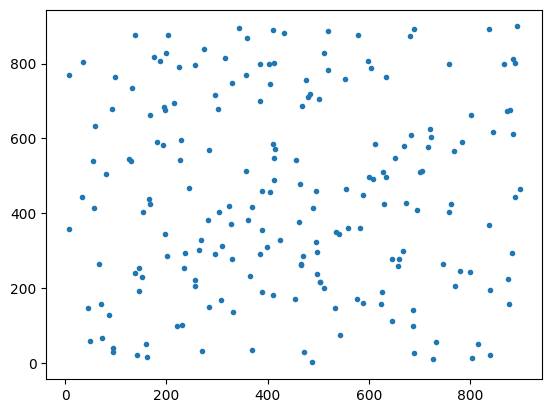

In [23]:
n_pins_list = [200]
testgdf = scale_and_translate(datas[0], plot=False)
for n_pins in n_pins_list:
    psrgbnir_grid = create_random_grid(testgdf, n_pins, kw='geometry', plot=True)
    save_array(psrgbnir_grid, f'psrgbnir_grid_{n_pins}.npy', overwrite=True)

    start = time.time()
    step = 200
    out = generate_pin_counts(datas, rad=30, n_pins=n_pins, stop=len(datas), kw='geometry', off=(0, 0), gridtype="random", plot=False)
    pd.DataFrame(out).to_csv(f'Building_{n_pins}_random.csv', index=False)
    print(f"--- {time.time() - start} seconds ---")
    print(len(out[0][2]))

In [24]:
df = pd.read_csv('Building_10_random.csv')

# Save the DataFrame to CSV with index=False
df.to_csv('Building_10_random.csv', index=False)

In [ ]:
# max buildings intersected by a pin in each output array
[max(out[i][2]) for i in range(len(out))][:20]

In [ ]:
# non-zero array indices for each output array
# confirms that pins are intersecting buildings
[np.nonzero(out[i][2]) for i in range(len(out))][:20]